# Train 데이터 EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
code_path = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(code_path)
from tokenization_kobert import KoBertTokenizer

In [2]:
model_name = 'monologg/kobert'
tokenizer = KoBertTokenizer.from_pretrained(model_name)
train_df = pd.read_csv('../data/train.csv')
category_dict = {
    0: 'IT과학',
    1: '경제',
    2: '사회',
    3: '생활문화',
    4: '세계',
    5: '스포츠',
    6: '정치'
}
train_df['target_text'] = train_df['target'].map(category_dict)

# 라벨별 개수

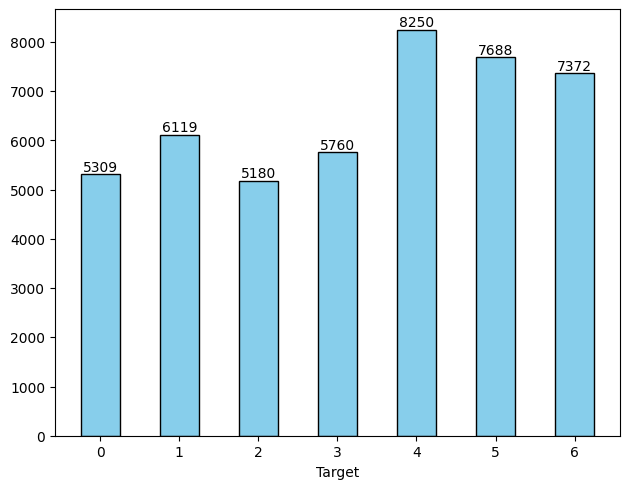

In [3]:
num_count = train_df['target'].value_counts().sort_index()
plt.bar(num_count.index, num_count, width=0.5, align='center', color='skyblue', edgecolor='black')
for i, v in category_dict.items():
    count = train_df['target'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.xlabel('Target')
plt.show()

# 토큰 길이

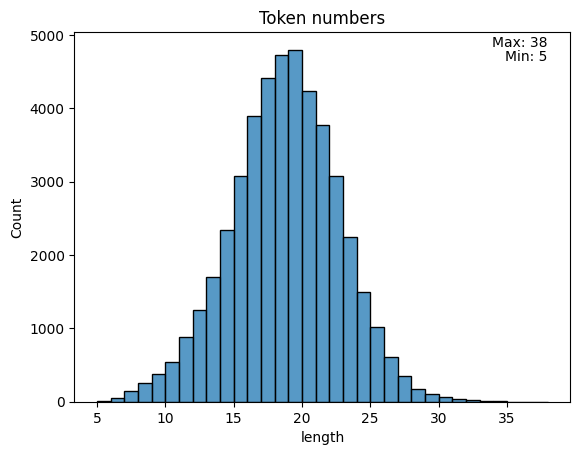

In [4]:
tokenized = tokenizer(train_df['text'].tolist())['input_ids']
new_df = pd.DataFrame({'input_ids':tokenized, 'target':train_df['target'].tolist()})
new_df['length'] = new_df['input_ids'].map(len)
new_df['target'] = train_df['target']

sns.histplot(new_df['length'], binwidth=1)
max_count = new_df['length'].value_counts().max()
max_value = max(new_df['length'])
min_value = min(new_df['length'])
plt.text(max(new_df['length']), max_count, f'Min: {min_value}', ha='right', va='top')
plt.text(max(new_df['length']), max_count, f'Max: {max_value}', ha='right', va='bottom')
plt.title('Token numbers')
plt.show()

# 라벨별 토큰 길이

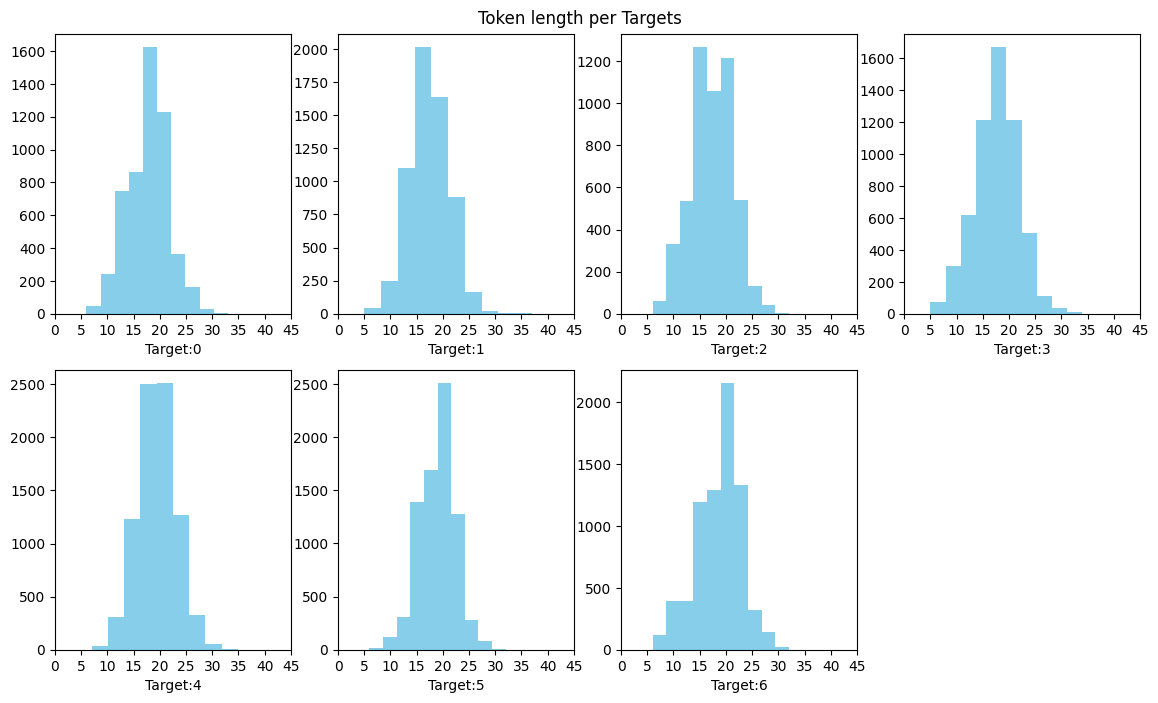

In [5]:
fig,ax=plt.subplots(2,4,figsize=(14,8))
for i in range(new_df['target'].nunique()):
    tmp = new_df[new_df['target']==i]['length']
    ax[i//4,i%4].hist(tmp, color='skyblue')
    ax[i//4,i%4].set_xlabel(f"Target:{i}")
    ax[i//4,i%4].set_xticks([5*j for j in range(10)])
ax[1,3].axis('off')
fig.suptitle('Token length per Targets',y=0.91)
plt.show()